1. Importáljuk be az adatelemzéshez szükséges könyvtárakat! (1p)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Olvassuk be a mellékelt spotify_yt.csv fájlt és tároljuk el egy DataFrame-ben a fájl tartalmát! (1p)

In [3]:
df = pd.read_csv('spotify_yt.csv')

3. Írassuk ki az adatkeretre vonatkozó statisztikákat és információkat! (1p)

In [4]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Url_spotify       20718 non-null  object 
 2   Track             20718 non-null  object 
 3   Album             20718 non-null  object 
 4   Album_type        20718 non-null  object 
 5   Uri               20718 non-null  object 
 6   Danceability      20708 non-null  float64
 7   Energy            20609 non-null  float64
 8   Key               20716 non-null  float64
 9   Loudness          20447 non-null  float64
 10  Speechiness       20716 non-null  float64
 11  Acousticness      20633 non-null  float64
 12  Instrumentalness  20664 non-null  float64
 13  Liveness          20716 non-null  float64
 14  Valence           20716 non-null  float64
 15  Tempo             20716 non-null  float64
 16  Duration_ms       20716 non-null  float6

4. Számoljuk meg, hogy oszloponként mennyi null érték fordul elő! (1p)

In [5]:
df.isnull().sum()

Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability         10
Energy              109
Key                   2
Loudness            271
Speechiness           2
Acousticness         85
Instrumentalness     54
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

5. Töltsük fel a hiányzó adatokat Loudness, Acousticness, Instrumentalness,Energy, Danceability oszlopokban! 
Feltöltéskor vegyük figyelembe, hogy az előadóhoz tartozó számok milyen átlagot alkotnak az adott oszlopokban, és azzal töltsük fel a hiányzó értékeket!
Ellenőrizzük az előző feladat műveletével, hogy sikerült-e a feltöltés! (2p)

In [6]:
fill_em_up = ["Loudness", "Acousticness", "Instrumentalness", "Energy", "Danceability"]

for oszlop in fill_em_up:
    atlag = df.groupby('Artist')[oszlop].mean()
    eloado_atlag = df['Artist'].map(atlag)
    df[oszlop] = df[oszlop].fillna(eloado_atlag)


print(df[fill_em_up].isnull().sum()==0)

Loudness            True
Acousticness        True
Instrumentalness    True
Energy              True
Danceability        True
dtype: bool


6. Írassuk ki azokat a sorokat, ahol a Speechiness, Liveness, Valence, Tempo, Key vagy Duration_ms oszlopok értékeiben null érték van!
Kiíratás után dobjuk el ezeket a sorokat helyben, majd ellenőrizzük, hogy sikerült-e a null értékek eltávolítása az adott oszlopokból. (1p)

In [7]:
oszlop = ['Speechiness', 'Liveness', 'Valence', 'Tempo', 'Key', 'Duration_ms']

null_sorok = df[df[oszlop].isnull().any(axis=1)]
print(null_sorok)
df = df.dropna(subset=oszlop)

check = df[oszlop].isnull().any()
print(check)

                       Artist  \
11890     Natasha Bedingfield   
13843  White Noise for Babies   

                                             Url_spotify  \
11890  https://open.spotify.com/artist/7o95ZoZt5ZYn31...   
13843  https://open.spotify.com/artist/4ZfEELHfyKd4od...   

                           Track  \
11890                These Words   
13843  Rain in the Early Morning   

                                                   Album Album_type  \
11890                                          Unwritten      album   
13843  Soothing Rain for Background Sounds and Natura...      album   

                                        Uri  Danceability    Energy  Key  \
11890  spotify:track:6MFQeWtk7kxWGydnJB2y36      0.593222  0.663778  NaN   
13843  spotify:track:4juc1w1fGFn8CxKp8gGThc      0.080233  0.077183  NaN   

        Loudness  ...                                  Url_youtube  \
11890  -6.277444  ...  https://www.youtube.com/watch?v=e5RuGj0g1tk   
13843 -31.195778  ...      

7. Írassuk ki a DataFrame oszlopainak az adattípusait!
Módosítsuk az adatszerkezetet úgy, hogy a Duration_ms, Key, Views, Likes, Comments, Stream oszlopok adattípusát int-re konvertáljuk, a Licensed, official_video oszlopok értékét boolean típusra konvertáljuk!
Ha az érték null érték lenne, adjunk meg -1-et az inteknél, illetve False-t a boolean adatoknál! (1p)

In [8]:
int_oszlopok = ['Duration_ms', 'Key', 'Views', 'Likes', 'Comments', 'Stream']
bool_oszlopok = ['Licensed', 'official_video']
df[int_oszlopok] = df[int_oszlopok].fillna(-1)
df[int_oszlopok] = df[int_oszlopok].astype(np.int64)

df[bool_oszlopok] = df[bool_oszlopok].fillna(False)
df[bool_oszlopok] = df[bool_oszlopok].astype(np.bool)

print(df.dtypes)

Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Key                   int64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms           int64
Url_youtube          object
Title                object
Channel              object
Views                 int64
Likes                 int64
Comments              int64
Description          object
Licensed               bool
official_video         bool
Stream                int64
dtype: object


C:\Users\herce\AppData\Local\Temp\ipykernel_22844\4237836645.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[bool_oszlopok] = df[bool_oszlopok].fillna(False)


8. Dobjuk el azokat a sorokat, ahol a Stream oszlopban -1 található!
Dobjuk el az Url_spotify, Uri oszlopokat is! (1p)

In [9]:
df = df[df['Stream'] != -1]
try:
    df = df.drop(['Url_spotify', 'Uri'], axis='columns')
except KeyError:
    print("mar torolve vannak a mezok!")
#print(df.columns)

9. Mentsük el a tisztított adatokat egy spotify_yt_cleaned.csv nevű fájlba! (1p)

In [10]:
df.to_csv('spotify_yt_cleaned.csv', index=False)

10. Számoljuk meg, hogy hány zeneszámhoz volt található Youtube videó! (1p)

In [11]:
df['Url_youtube'].count()

np.int64(19691)

11. Keressük meg melyik az a 10 előadó, akinek a zenéjére lehetne a leginkább táncolni!
A rangsor állításakor azt vegyük figyelembe, hogy átlagosan milyen Danceability értékei vannak az előadó számainak. (1p)

In [12]:
df.groupby('Artist')['Danceability'].mean().sort_values().tail(10)

Artist
Blueface                  0.850200
Migos                     0.851100
Ski Mask The Slump God    0.852800
Ovy On The Drums          0.854600
Plan B                    0.858286
Dave                      0.859100
Megan Thee Stallion       0.860500
Young Dolph               0.862900
Three 6 Mafia             0.866556
Saweetie                  0.885800
Name: Danceability, dtype: float64

12. Határozzuk meg és írassuk ki a 10 legtöbbet streamelt előadót a 10 legtöbbet nézett előadóval együtt!
Ábrázoljuk egyetlen diagrammon, két tengellyel a 10 legtöbbet streamelt előadót és hasonlítsuk össze oszlopdiagrammokkal, hogy mennyi Youtube megtekintésük van a Streamek száma mellett!
Figyeljünk a helyes megjelenítésre! Tegyük részben átlátszóvá az előbb álló oszlopot!
Jelenítsünk meg jelmagyarázatot legalább az egyik oszlopra! (3p)

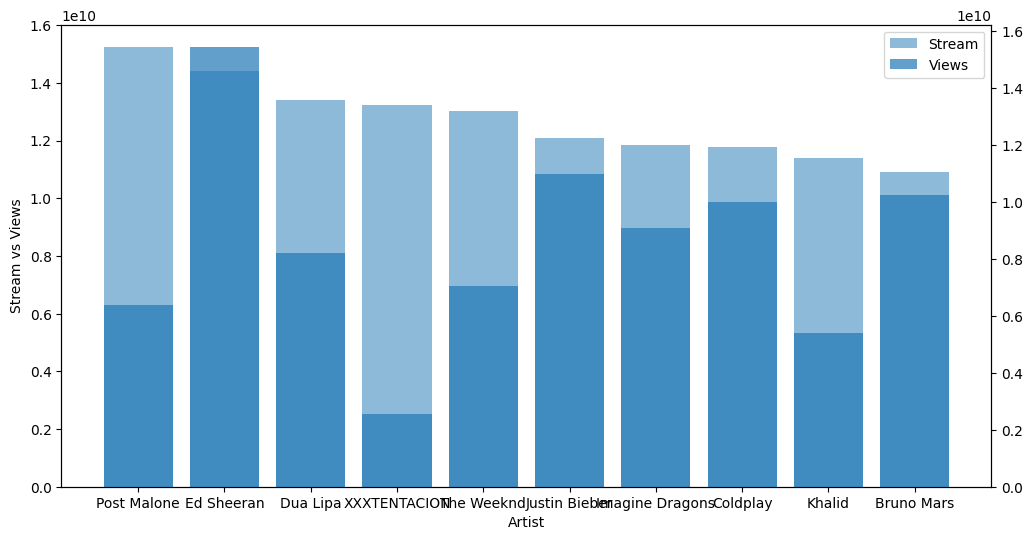

In [42]:
top10_stream = df.groupby('Artist')['Stream'].sum().sort_values(ascending=False).head(10)
top10_views = df.groupby('Artist')['Views'].sum()[top10_stream.index]

#print(top10_stream)
#print(top10_views)

ax1 = plt.subplots(figsize=(12,6))[1]
ax2 = ax1.twinx()

line1 = ax1.bar(top10_stream.index, top10_stream.values, alpha=0.5)
line2 = ax2.bar(top10_stream.index, top10_views.values, alpha=0.7)

ax1.set_xlabel('Artist')
ax1.set_ylabel('Stream vs Views')

ax1.legend([line1, line2], ['Stream','Views'])

plt.xticks(rotation=45)
plt.show()

13. Ábrázoljuk korrelációs mátrixxal, hogy milyen zenei tulajdonságok járultak hozzá a 10 legnépszerűbb zeneszámhoz (streamelések alapján!)
Figyeljünk oda, hogy a számokat tartalmazó oszlopokkal dolgozzunk csak!
Ügyeljünk a jól látható megjelenítésre! (2p)

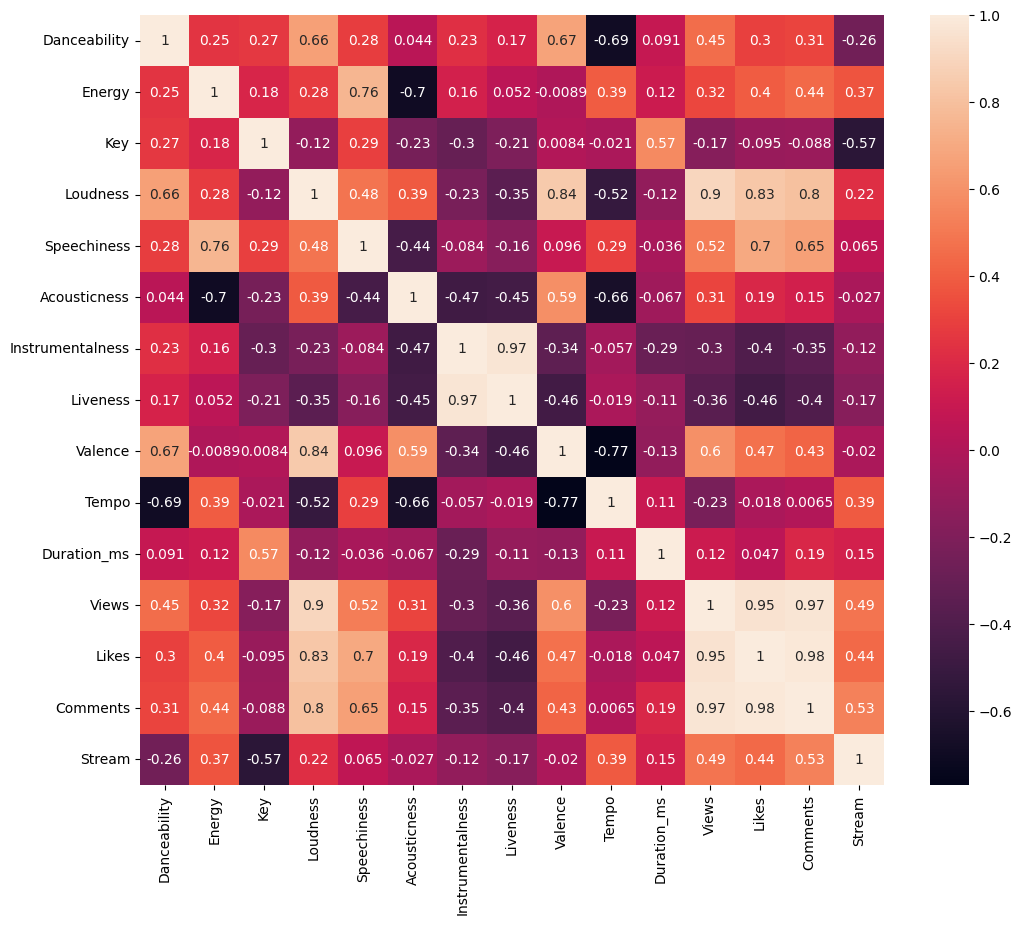

In [43]:
top10_songs = df.sort_values(by="Stream").tail(10)
numeric_cols = top10_songs.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_cols.corr(), annot=True)
plt.show()

14. Döntsük el, hogy kinek van a legtöbb streamelése Spotify-on és megtekintése
Youtube-on J. Cole, Kendrick Lamar és Drake közül a jelenlegi adathalmazunk alapján!
A szűréskor figyeljünk arra, hogy az említett előadók zeneszámok nevében is feltűnhetnek és hogy ne legyenek duplikátumok az adataink között (tekinthetjük úgy, hogy a zeneszám neve egyedi).
Ábrázoljuk az eredményeket egymás mellett két kördiagrammon, ahol megjelenítjük a neveket a körcikkek mellett, egyedi színeket adunk a körcikkeknek, majd nevet adunk a kördiagrammoknak!
Állítsunk be tetszőleges hátteret az egész diagrammnak! (3p)

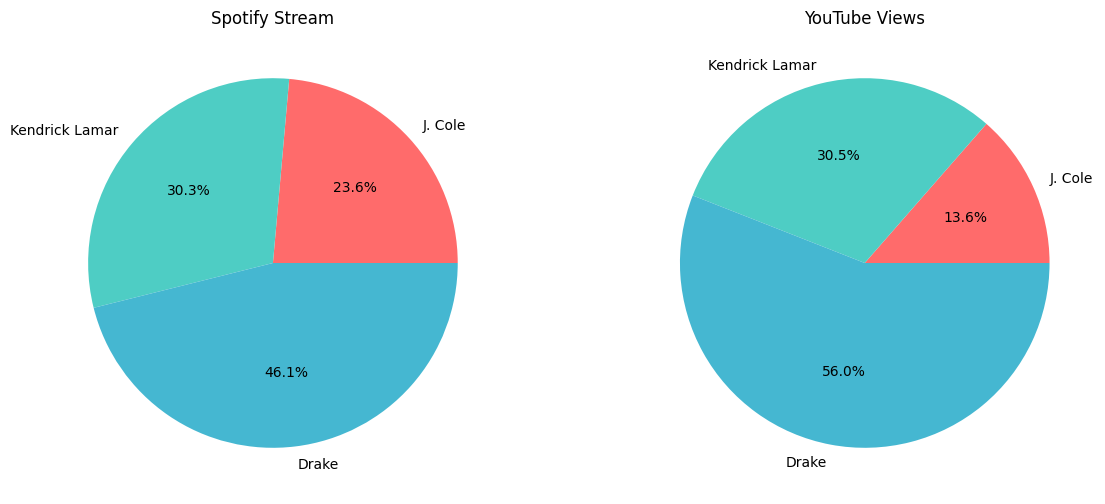

In [44]:
artists = ['J. Cole', 'Kendrick Lamar', 'Drake']

df_unique = df.drop_duplicates(subset='Track')

total_streams = {artist: 0 for artist in artists}
total_views = {artist: 0 for artist in artists}

for _, row in df_unique.iterrows():
    title = str(row['Title']).lower()
    author = row['Artist']
    streams = row['Stream']
    views = row['Views']

    #eloadok
    for artist in artists:
        artist_lower = artist.lower()
        
        if author == artist:
            total_streams[artist] += streams
            total_views[artist] += views
        
        # nev cimben check
        if artist_lower in title:
            total_streams[artist] += streams
            total_views[artist] += views

#print("Összes stream:", total_streams)
#print("Összes views:", total_views)

(ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))[1]

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

ax1.pie(
    total_streams.values(),
    labels=total_streams.keys(),
    autopct='%1.1f%%',
    colors=colors
)
ax1.set_title('Spotify Stream')

ax2.pie(
    total_views.values(),
    labels=total_views.keys(),
    autopct='%1.1f%%',
    colors=colors
)
ax2.set_title('YouTube Views')

plt.show()